# Counting blobs with pyclesperanto

A common use case for image processing in the biology context is counting blobs of high signal intensity surrounded by a low intensity background. Thresholding is the method of choice in this scenario. We demonstrate it with Otsu's thresholding method (Otsu et al., IEEE Transactions on Systems, Man, and Cybernetics, Vol. 9 (1), 1979)

In [1]:
import pyclesperanto as cle

from skimage.io import imread, imsave, imshow
import matplotlib
import numpy as np

# we select a GPU
cle.select_device("TX")

(OpenCL) NVIDIA GeForce RTX 2080 SUPER (OpenCL 3.0 CUDA)
	Type: GPU
	Compute Units: 48
	Global Memory Size: 8366 MB
	Maximum Object Size: 2091 MB

In [2]:
# load data
image = imread('https://samples.fiji.sc/blobs.png').squeeze()
print("Image size: ",image.shape)

Image size:  (254, 256)


## Image processing using pyclesperanto

After we initialised a GPU and loaded some data to process as a numpy array, we can start using the librairy and build a workflow like this:

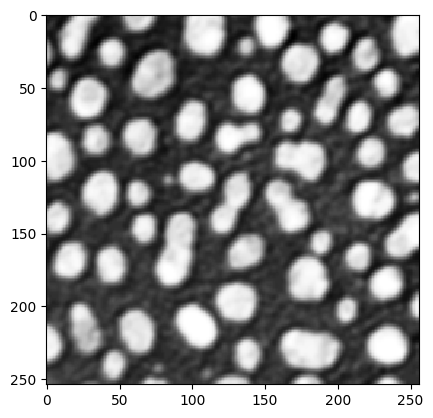

In [3]:
blurred = cle.gaussian_blur(image, sigma_x=1, sigma_y=1)
cle.imshow(blurred)

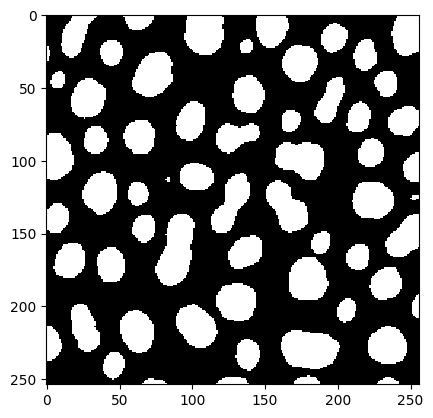

In [4]:
binary = cle.threshold_otsu(blurred)
cle.imshow(binary)

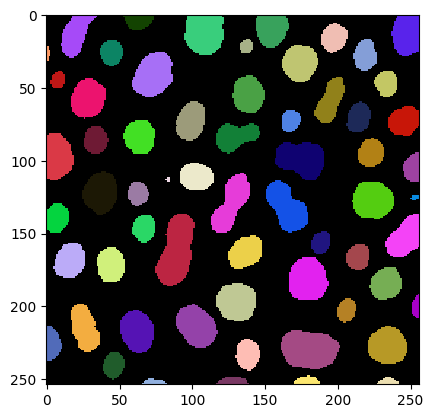

In [9]:
labeled = cle.connected_components_labeling_box(binary)
cle.imshow(labeled, labels=True)

In [10]:
# The maximium intensity in a label image corresponds to the number of objects
num_labels = cle.maximum_of_all_pixels(labeled)
print("Number of objects in the image: " + str(num_labels))

Number of objects in the image: 62.0


In case the size of the objects is relevant, one should exclude the object which were not fully imaged and thus, touch the image border.

In [7]:
# Exclude Labels On Edges
labels_excl_edges = cle.exclude_labels_on_edges(labeled)
labels_excl_edges

AttributeError: module 'pyclesperanto' has no attribute 'exclude_labels_on_edges'